In [1]:
import pandas as pd

In [2]:
avisos_detalles      = pd.read_csv('../data/fiuba_6_avisos_detalle.csv')
avisos_visitas       = pd.read_csv('../data/fiuba_3_vistas.csv')
avisos_postulaciones = pd.read_csv('../data/fiuba_4_postulaciones.csv')

In [3]:
# Cambiar el tipo de dato de la fecha de postulacion.
avisos_postulaciones['fechapostulacion'] = avisos_postulaciones['fechapostulacion'].apply(pd.to_datetime)

In [4]:
avisos_detalles.head(20)

idaviso  idpais                                             titulo  \
0      8725750       1                   VENDEDOR/A PROVINCIA DE SANTA FE   
1     17903700       1                                         Enfermeras   
2   1000150677       1                                     Chofer de taxi   
3   1000610287       1      CHOFER DE CAMIONETA BAHIA BLANCA - PUNTA ALTA   
4   1000872556       1      Operarios de Planta - Rubro Electrodomésticos   
5   1001135716       1      Vendedor Viajante TUCUMAN/SANTIAGO DEL ESTERO   
6   1001326344       1           Vendedor Viajante RECONQUISTA/AVELLANEDA   
7   1001455648       1            Vendedor Viajante PILAR / ESCOBAR/TIGRE   
8      9240880       1  Productores Asesores Independiente, para venta...   
9   1001202662       1                              promotor/a , asesor/a   
10  1001724563       1                                         Paramédico   
11  1002181678       1                 Vendedor Viajante TIERRA DEL FUEGO   
12  1002308544       1   Preventistas Importante Distribuidora de Bebidas   
13  1002377536       1  Personal con experiencia en lavandería  para H...   
14  1002448818       1                           Ejecutivo de Cuentas Sr.   
15  1002511855       1                                Ingeniero Electrico   
16  1110319893       1                Vendedores Telefónicos (Part- time)   
17  1110383223       1  Vendedor Viajante ADROGUE/LANUS/AVELLANEDA/LOM...   
18  1110386791       1                        Analista de Demand Planning   
19  1110185164       1                        Administrativo de Recepción   

                                          descripcion        nombre_zona  \
0   <p><strong><strong>Empresa:</strong></strong> ...  Gran Buenos Aires   
1   <p>Solicitamos para importante cadena de farma...  Gran Buenos Aires   
2   <p>TE GUSTA MANEJAR? QUERES GANAR PLATA HACIEN...    Capital Federal   
3   <p><strong>Somos una empresa multinacional que...  Gran Buenos Aires   
4   <p><strong>OPERARIOS DE PLANTA</strong></p><p>...  Gran Buenos Aires   
5   <p>Somos una empresa multinacional que opera e...  Gran Buenos Aires   
6   <p><strong>Somos una empresa multinacional que...  Gran Buenos Aires   
7   <p>Somos una empresa multinacional que opera e...  Gran Buenos Aires   
8   Agente\r\noficial Selecciona:</span></strong><...    Capital Federal   
9   <p>En Cerantola nos encontramos en la busqueda...  Gran Buenos Aires   
10  <p>Nos encontramos en un proceso de selección ...  Gran Buenos Aires   
11  <p><strong>Somos una empresa multinacional que...  Gran Buenos Aires   
12  <p>YAMANIL S-A . se encuentra en busqueda de p...  Gran Buenos Aires   
13  <p><strong><span lang="ES">Adecco Hoteles y Ca...  Gran Buenos Aires   
14  <p>Importante empresa del Mercado Asegurador A...  Gran Buenos Aires   
15  <p>Nos encontramos en búsqueda de un  Ingenier...  Gran Buenos Aires   
16  <p><strong>Estamos en busqueda de representant...  Gran Buenos Aires   
17  <p><strong>Somos una empresa multinacional que...  Gran Buenos Aires   
18  <p>SC Johnson, empresa líder mundial en fabric...  Gran Buenos Aires   
19  <p>Centro Médico Accord se encuentra en la bús...  Gran Buenos Aires   

             ciudad       mapacalle tipo_de_trabajo  \
0               NaN             NaN       Full-time   
1               NaN             NaN       Full-time   
2               NaN  Empedrado 2336       Full-time   
3               NaN             NaN       Full-time   
4               NaN             NaN       Full-time   
5               NaN             NaN       Full-time   
6               NaN             NaN       Full-time   
7               NaN             NaN       Full-time   
8      Buenos Aires             NaN       Full-time   
9               NaN             NaN       Full-time   
10              NaN             NaN       Full-time   
11              NaN             NaN       Full-time   
12              NaN             NaN       Full-time   
13              NaN   

In [5]:
avisos_detalles.groupby('nivel_laboral')['nivel_laboral'].count()

nivel_laboral
Gerencia / Alta Gerencia / Dirección     181
Jefe / Supervisor / Responsable          809
Junior                                  2216
Otro                                     921
Senior / Semi-Senior                    9407
Name: nivel_laboral, dtype: int64

In [6]:
# Cuales son los niveles laborales mas requeridos?
avisos_detalles.groupby('nivel_laboral')['nivel_laboral'].count().sort_values(ascending=True).plot(kind='bar');

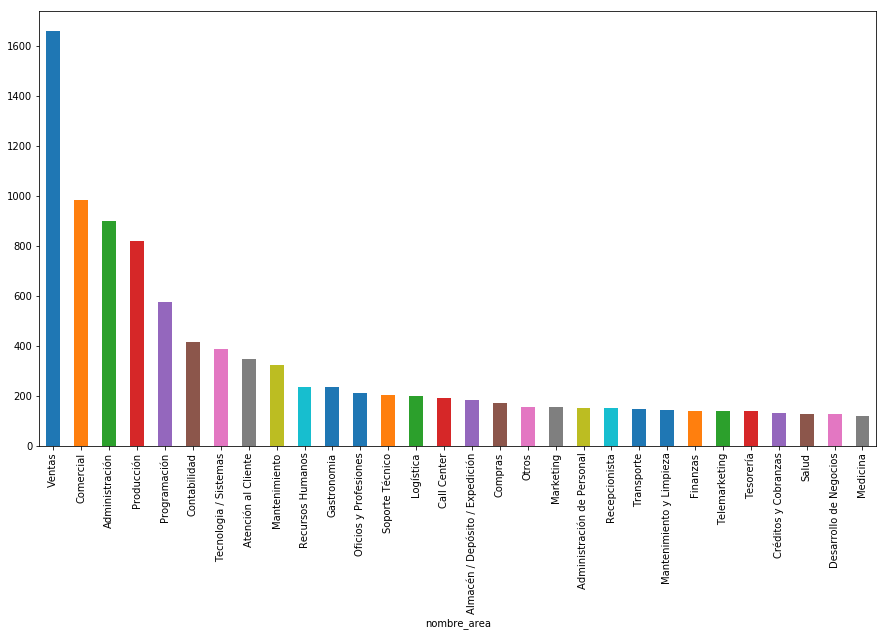

In [7]:
# Cuales son las areas laborales con mayor oferta?
avisos_detalles.groupby('nombre_area')['nombre_area'].count().sort_values(ascending=False).head(30).plot(kind='bar', figsize=(15,8));

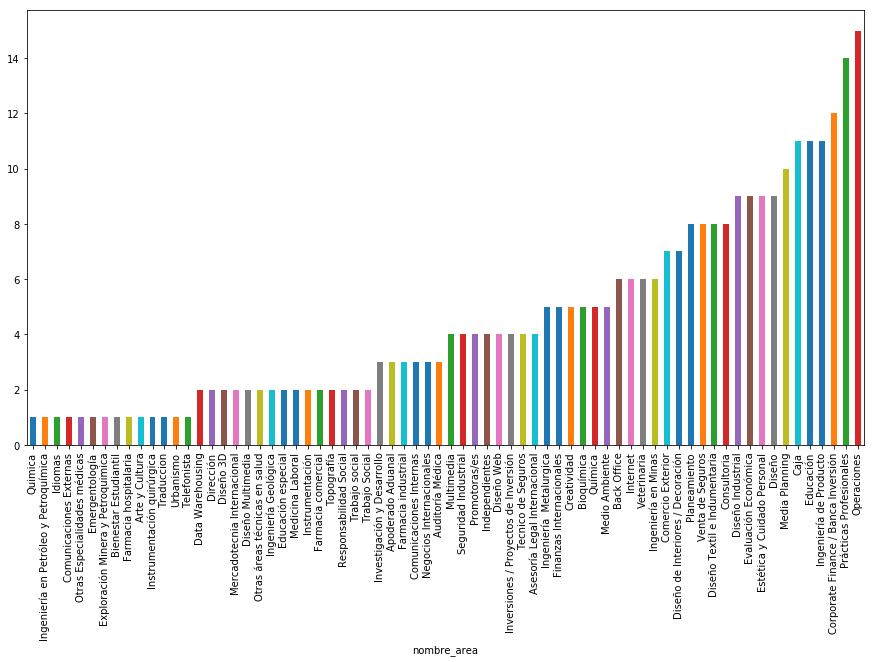

In [8]:
# Cuales son las areas laborales con menor oferta?
avisos_detalles.groupby('nombre_area')['nombre_area'].count().sort_values(ascending=True).head(70).plot(kind='bar', figsize=(15,8));

In [9]:
avisos_postulaciones_with_detail = pd.merge(avisos_postulaciones, avisos_detalles,  how='inner', left_on='idaviso', right_on='idaviso')

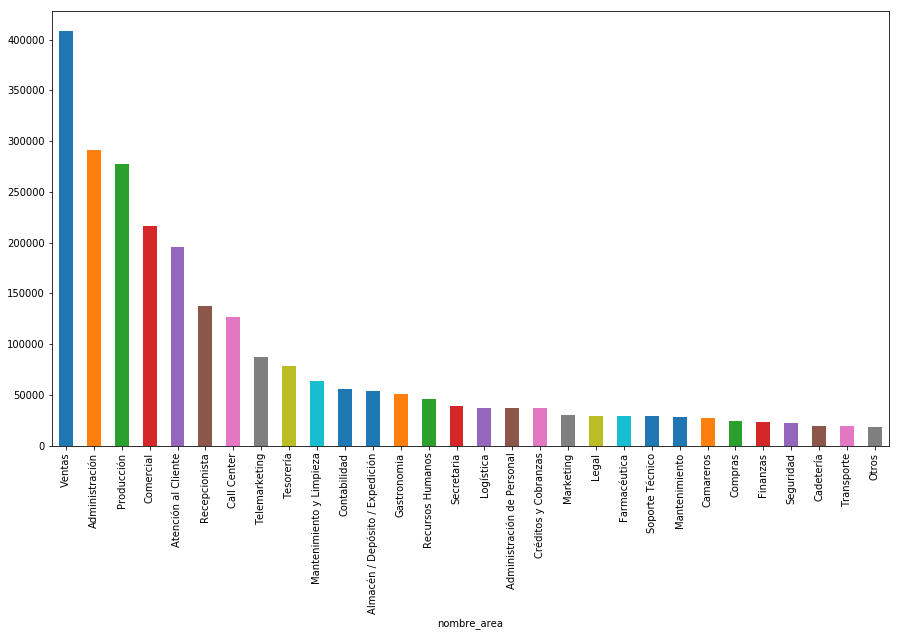

In [10]:
# Cuales son las areas laborales con mayor cantidad de postulaciones?
avisos_postulaciones_with_detail.groupby('nombre_area')['nombre_area'].count().sort_values(ascending=False).head(30).plot(kind='bar', figsize=(15,8));

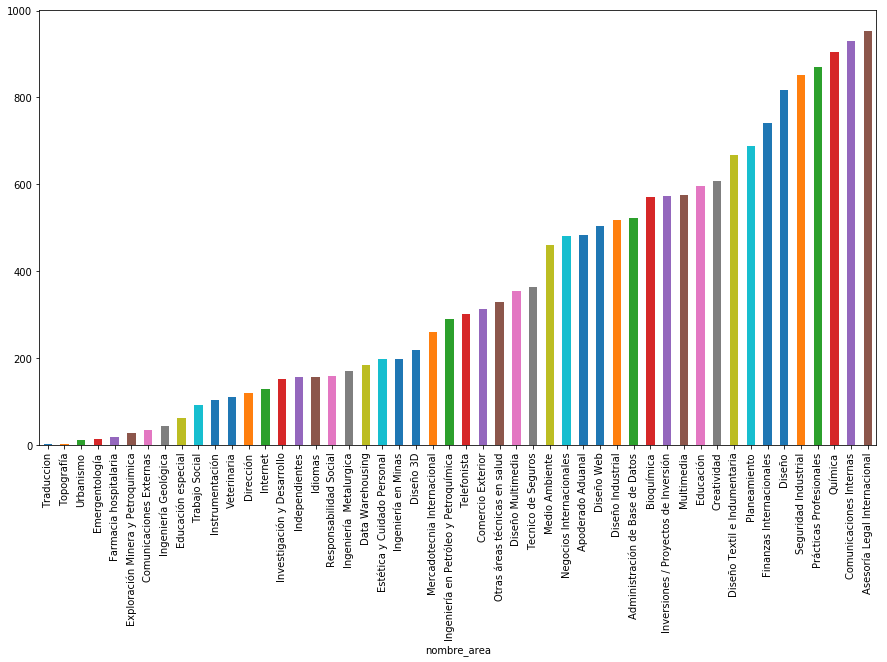

In [11]:
# Cuales son las areas laborales con menor cantidad de postulaciones?
avisos_postulaciones_with_detail.groupby('nombre_area')['nombre_area'].count().sort_values(ascending=True).head(50).plot(kind='bar', figsize=(15,8));